In [48]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
import numpy as np

from src.GridWorldMDP.objectworld_utils import draw_path, generate_demonstrations, init_object_world, visitation_frequency
from src.deepmaxent_irl_objectworld import run_deepmaxent_irl
from src.maxent_irl_objectworld import run_maxent_irl
from src.img_utils import Visualizer, get_evd, draw_evd
from src.argument_parser import get_parser, parse_args_str

PARSER = get_parser()

In [25]:
np.random.seed(1)
BASIC_ARGS = """
--exp_name test
--height 6
--n_objects 7
--n_colours 2
--seed 2
"""
args = parse_args_str(PARSER, BASIC_ARGS)
print(args.exp_name)

init_start_pos = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
print('start positions: ', init_start_pos)

ow, P_a, rewards_gt, values_gt, policy_gt, feat_map = init_object_world(args)
ow.grid

test
start positions:  [[5, 3]]
[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration


array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  1.,  1.,  1., -1.],
       [ 0.,  0.,  0.,  1.,  1., -1.]])

In [26]:
ow.objects

{(5, 0): <OWObject (In: 0) (Out: 1)>,
 (2, 3): <OWObject (In: 0) (Out: 1)>,
 (2, 1): <OWObject (In: 0) (Out: 1)>,
 (5, 2): <OWObject (In: 1) (Out: 1)>,
 (4, 5): <OWObject (In: 0) (Out: 0)>,
 (4, 2): <OWObject (In: 1) (Out: 1)>,
 (2, 4): <OWObject (In: 1) (Out: 1)>}

## Maxent

In [ ]:
MAXENT_ARGS = """
--exp_name maxent_rand
--type object
--n_objects 7
--n_colours 4
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 5
--l_traj 6
--learning_rate 0.1
--n_iters 10
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--active
--seed 2
"""
args = parse_args_str(PARSER, MAXENT_ARGS)
print(args.exp_name)

history_maxent_active = run_maxent_irl(args, init_start_pos=init_start_pos)

In [ ]:
visualizer = Visualizer(history_maxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

---

## Deep Maxent

In [ ]:
init_start_pos

In [62]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--type object
--n_objects 7
--n_colours 2
--height 6
--width 6
--gamma 0.9
--act_random 0.3
--n_trajs 10
--l_traj 8
--learning_rate 0.05
--n_iters 20
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--hiddens 3 3
--device cuda
--active
--seed 2
--verbose 2
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_ACTIVE_ARGS)
print(args.exp_name)
history_deepmaxent_active = run_deepmaxent_irl(args, init_start_pos=init_start_pos)

deepmaxent_active
[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration
[INFO] Initialize trajectories
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 4 3 1]]
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:1--
[[ 1.5033  1.1632  1.483   1.1454  1.4193  2.079 ]
 [-0.2633 -0.691   0.1991 -0.9128 -0.4501  1.3928]
 [-1.5237 -2.8992 -0.262  -2.416  -2.1747  1.3273]
 [-0.8953 -1.5373 -0.4501  0.5947  1.2059  1.2476]
 [-1.9303 -1.516  -2.067   1.3273  1.3342  0.6276]
 [-3.6413 -1.9565 -2.4434  1.344   1.6093  1.2969]]
[INFO - n_trajs:1] Policy evaluation
-- evd = 2.670112 ---
[INFO - n_trajs:1] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:1--
[[2.361  2.1215 1.7369 0.7645 0.5664 0.3673]
 [1.5022 1.4034 1.1995 0.9774 1.4389 0.6255]
 [0.9766 1.0347 1.1011 2.1254 1.4858 1.157 ]
 [0.9237 0.9558 1.5038 2.5692 3.2477 3.2513]
 [1.5207 0.9641 1.4376 2.3781 3.3661 4.0692]
 [0.6904 0.8126 1.3851 2.358  3.6879 3.9679]]
[INFO - n_trajs:1] Generating a new demonstrations from [(4, 5)]
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 2 0]
 [0 0 0 1 0 1]
 [0 0 0 5 4 2]]
[INFO - n_trajs:2] Training Deep MaxEnt 

  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:2--
[[ 0.839   0.7804  0.9158  0.8476  0.9791  1.2224]
 [ 0.5133  0.4132  0.6244  0.4774  0.6997  1.0821]
 [ 0.3509  0.0123  0.5104  0.121   0.5866  1.0753]
 [ 0.5236  0.4178  0.6997  0.6359  0.894   0.7611]
 [ 0.3497  0.6004  1.0567  1.0753  0.7752  0.4149]
 [-0.0689  0.3947  0.9472  1.1421  0.9159  0.7952]]
[INFO - n_trajs:2] Policy evaluation
-- evd = 1.672479 ---
[INFO - n_trajs:2] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:2--
[[4.8093 5.0153 4.7109 4.0766 3.8057 3.4716]
 [4.947  5.3066 5.1166 4.8371 4.561  4.3046]
 [5.5716 5.8927 5.8049 5.6729 5.2425 4.7748]
 [5.4062 5.1629 5.4717 5.9001 6.5305 5.3761]
 [3.9279 4.3405 5.745  6.222  6.6992 6.4716]
 [3.3417 3.937  5.3685 5.9268 6.1783 5.907 ]]
[INFO - n_trajs:2] Generating a new demonstrations from [(4, 4)]
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 2 5 0]
 [0 0 0 3 2 1]
 [0 0 0 5 4 2]]
[INFO - n_trajs:3] Training Deep MaxEnt 

  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:3--
[[-0.2664 -0.2427 -0.065  -0.071   0.0604  0.2052]
 [-0.4758 -0.5029 -0.2435 -0.2905 -0.0639  0.185 ]
 [-0.5566 -0.7733 -0.2962 -0.5149 -0.0151  0.2275]
 [-0.3654 -0.3647 -0.0639 -0.0955  0.1503  0.0584]
 [-0.4961 -0.1829  0.2578  0.2275  0.0357 -0.2095]
 [-0.8608 -0.3597  0.1957  0.2515  0.113   0.0033]]
[INFO - n_trajs:3] Policy evaluation
-- evd = 1.349783 ---
[INFO - n_trajs:3] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:3--
[[5.0798 4.8315 5.0787 5.1387 5.4571 5.2746]
 [5.9125 5.5361 5.8463 5.7879 6.2155 6.2929]
 [5.9259 5.5769 5.8202 6.318  6.8214 6.7425]
 [5.0154 5.1264 5.8652 6.7506 7.6078 7.2549]
 [3.7738 4.5722 6.2772 7.1324 7.6837 7.5297]
 [3.3461 4.2769 6.0064 6.7897 7.0978 6.7342]]
[INFO - n_trajs:3] Generating a new demonstrations from [(4, 4)]
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 1 0 0]
 [0 0 0 3 5 0]
 [0 0 0 4 4 1]
 [0 0 0 6 5 2]]
[INFO - n_trajs:4] Training Deep MaxEnt 

  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:4--
[[-0.0363 -0.0559 -0.0746 -0.0896 -0.0932 -0.0864]
 [-0.0513 -0.0713 -0.0944 -0.1139 -0.1162 -0.1079]
 [-0.0643 -0.0869 -0.1111 -0.1358 -0.128  -0.1305]
 [-0.0743 -0.1008 -0.1162 -0.152  -0.1655 -0.2071]
 [-0.0771 -0.0954 -0.0793 -0.1305 -0.2258 -0.2946]
 [-0.0735 -0.1029 -0.081  -0.1178 -0.1968 -0.2545]]
[INFO - n_trajs:4] Policy evaluation
-- evd = 2.938056 ---
[INFO - n_trajs:4] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:4--
[[7.056  7.9618 8.3098 8.351  8.0508 7.133 ]
 [7.9779 8.7065 8.9922 9.0147 8.7445 7.9813]
 [8.3359 9.0094 9.2559 9.2509 8.9775 8.256 ]
 [8.3782 9.043  9.2568 9.2092 8.9337 8.2922]
 [8.0854 8.7882 8.9787 8.8704 8.6286 8.1547]
 [7.1851 8.0559 8.2684 8.1651 7.9275 7.407 ]]
[INFO - n_trajs:4] Generating a new demonstrations from [(3, 2)]
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 2 1 1]
 [0 1 2 4 5 1]
 [0 0 0 4 4 1]
 [0 0 0 6 5 2]]
[INFO - n_trajs:5] Training Deep MaxEnt 

  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:5--
[[ 0.1839  0.1801  0.1868  0.1819  0.1897  0.2074]
 [ 0.167   0.1583  0.1681  0.157   0.1706  0.1963]
 [ 0.1585  0.1335  0.1566  0.1243  0.1636  0.1952]
 [ 0.1662  0.1576  0.1706  0.1516  0.1704  0.1148]
 [ 0.1581  0.1681  0.1826  0.1952  0.0695 -0.0942]
 [ 0.1385  0.1576  0.1785  0.2006  0.1298 -0.0146]]
[INFO - n_trajs:5] Policy evaluation
-- evd = 2.600125 ---
[INFO - n_trajs:5] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:5--
[[7.2583 8.1477 8.4479 8.4147 8.0378 7.0879]
 [8.1638 8.8943 9.1557 9.109  8.7578 7.9518]
 [8.5144 9.2055 9.4418 9.3867 9.0178 8.198 ]
 [8.5414 9.2247 9.4439 9.3678 8.9797 8.1753]
 [8.2748 8.9642 9.1618 9.0231 8.6245 8.0273]
 [7.4623 8.2489 8.4425 8.2818 7.9012 7.3308]]
[INFO - n_trajs:5] Generating a new demonstrations from [(3, 2)]
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 3 3 2 1]
 [0 1 6 4 5 1]
 [0 0 0 4 4 1]
 [0 0 0 6 5 2]]
[INFO - n_trajs:6] Training Deep MaxEnt 

  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:6--
[[ 0.3653  0.3881  0.4233  0.4347  0.4514  0.473 ]
 [ 0.3512  0.3828  0.4265  0.4281  0.4472  0.484 ]
 [ 0.3454  0.3498  0.4416  0.4099  0.4376  0.5102]
 [ 0.3678  0.3963  0.4472  0.4852  0.5072  0.4246]
 [ 0.3507  0.3952  0.3981  0.5102  0.3234 -0.6844]
 [ 0.2981  0.3855  0.3868  0.5023  0.4834 -0.007 ]]
[INFO - n_trajs:6] Policy evaluation
-- evd = 2.215332 ---
[INFO - n_trajs:6] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:6--
[[7.434  8.1747 8.3964 8.3453 7.9677 7.0358]
 [8.2664 8.8619 9.0773 9.0242 8.6446 7.8136]
 [8.5659 9.1171 9.3152 9.246  8.7863 7.8282]
 [8.5506 9.1096 9.2714 9.125  8.4754 7.4198]
 [8.3145 8.8742 8.9676 8.6299 7.77   6.5814]
 [7.6205 8.19   8.256  7.825  6.9041 5.4706]]
[INFO - n_trajs:6] Generating a new demonstrations from [(2, 2)]
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 5 6 5 1]
 [0 1 6 4 5 1]
 [0 0 0 4 4 1]
 [0 0 0 6 5 2]]
[INFO - n_trajs:7] Training Deep MaxEnt 

  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:7--
[[-0.4737 -0.3508 -0.294  -0.2012 -0.1551 -0.1615]
 [-0.3093 -0.1516 -0.1046  0.0189  0.0776  0.0595]
 [-0.2078  0.0325  0.0225  0.228   0.3002  0.234 ]
 [-0.2203 -0.0441  0.0776  0.1786  0.2791  0.178 ]
 [-0.1563 -0.0282  0.2053  0.234   0.0138 -0.191 ]
 [-0.0349 -0.0389  0.1889  0.2069  0.0671 -0.2699]]
[INFO - n_trajs:7] Policy evaluation
-- evd = 1.148080 ---
[INFO - n_trajs:7] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:7--
[[6.4455 6.4505 6.4826 6.4116 6.3011 6.0588]
 [6.5166 6.5938 6.7682 6.9211 6.959  6.7153]
 [6.5765 6.8885 7.2536 7.7603 7.9405 7.3915]
 [6.846  7.1608 7.7869 8.3145 8.2406 7.551 ]
 [6.8143 7.0953 7.9066 8.2883 7.8954 7.1857]
 [6.3344 6.7676 7.4192 7.6372 7.3368 6.8431]]
[INFO - n_trajs:7] Generating a new demonstrations from [(3, 3)]
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 1 1 2]
 [0 0 5 7 5 3]
 [0 1 6 5 5 1]
 [0 0 0 4 4 1]
 [0 0 0 6 5 2]]
[INFO - n_trajs:8] Training Deep MaxEnt 

  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:8--
[[-2.326e-01 -1.782e-01 -1.439e-01 -1.007e-01 -8.800e-02 -1.069e-01]
 [-1.637e-01 -1.052e-01 -6.840e-02  2.000e-04  1.560e-02 -2.390e-02]
 [-1.098e-01 -6.800e-03 -2.250e-02  9.730e-02  1.212e-01  3.340e-02]
 [-1.011e-01 -1.840e-02  1.560e-02  2.630e-02  4.770e-02 -5.280e-02]
 [-7.130e-02 -1.710e-02  3.110e-02  3.340e-02 -2.159e-01 -6.990e-01]
 [-2.050e-02 -4.800e-03  3.420e-02  2.050e-02 -9.140e-02 -5.416e-01]]
[INFO - n_trajs:8] Policy evaluation
-- evd = 2.142503 ---
[INFO - n_trajs:8] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:8--
[[7.576  8.0775 8.2439 8.2448 8.07   7.4245]
 [8.0725 8.5205 8.7173 8.7602 8.6027 7.9935]
 [8.301  8.8239 9.0192 9.0435 8.7451 7.9593]
 [8.3726 8.9533 9.15   8.9917 8.3461 7.5249]
 [8.0852 8.7419 8.8927 8.536  7.6303 6.6644]
 [7.2113 8.0288 8.1493 7.7665 6.827  5.7571]]
[INFO - n_trajs:8] Generating a new demonstrations from [(3, 2)]
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 

  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:9--
[[-0.2934 -0.2558 -0.1907 -0.1615 -0.1156 -0.0695]
 [-0.289  -0.2755 -0.1939 -0.1616 -0.0843 -0.03  ]
 [-0.2701 -0.2775 -0.1914 -0.1845 -0.0199  0.0085]
 [-0.2158 -0.1762 -0.0843 -0.1178 -0.0201 -0.0787]
 [-0.2265 -0.1127  0.0338  0.0085 -0.1219 -0.1909]
 [-0.2802 -0.1544  0.0181  0.018  -0.0971 -0.1864]]
[INFO - n_trajs:9] Policy evaluation
-- evd = 1.813413 ---
[INFO - n_trajs:9] Calculating the acqusition map
-- Acquisition Function Map when n_trajs:9--
[[7.3663 7.8069 7.9072 7.8948 7.6986 6.9593]
 [8.0095 8.3258 8.4216 8.4339 8.3345 7.7736]
 [8.0541 8.335  8.4885 8.6411 8.6345 8.0726]
 [7.8856 8.1759 8.4518 8.777  8.8326 8.2331]
 [7.5442 7.8806 8.3668 8.6406 8.6376 8.1558]
 [6.9511 7.3152 7.7597 7.976  7.9249 7.4657]]
[INFO - n_trajs:9] Generating a new demonstrations from [(3, 4)]
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 1 1 2]
 [0 0 5 7 5 4]
 [0 1 7 6 9 3]
 [0 0 1 5 6 4]
 [0 0 0 6 5 2]]
[INFO - n_trajs:10] Training Deep MaxEnt

  0%|          | 0/20 [00:00<?, ?it/s]

--Unnormed Reward Map (Recovered) when n_trajs:10--
[[-0.9265 -0.8513 -0.7945 -0.7273 -0.639  -0.5303]
 [-0.8219 -0.6446 -0.6392 -0.496  -0.3817 -0.2887]
 [-0.7266 -0.2504 -0.455  -0.0036  0.1095  0.019 ]
 [-0.7828 -0.597  -0.3817 -0.1632  0.0793  0.0286]
 [-0.7124 -0.5641  0.0428  0.019  -0.0983 -0.0546]
 [-0.3892 -0.6216 -0.0282 -0.0028 -0.132  -0.2735]]
[INFO - n_trajs:10] Policy evaluation
-- evd = 1.044867 ---


In [63]:
for o, v in history_deepmaxent_active[0]['ow'].objects.items():
    print(o, v)

(5, 0) <OWObject (In: 0) (Out: 1)>
(2, 3) <OWObject (In: 0) (Out: 1)>
(2, 1) <OWObject (In: 0) (Out: 1)>
(5, 2) <OWObject (In: 1) (Out: 1)>
(4, 5) <OWObject (In: 0) (Out: 0)>
(4, 2) <OWObject (In: 1) (Out: 1)>
(2, 4) <OWObject (In: 1) (Out: 1)>


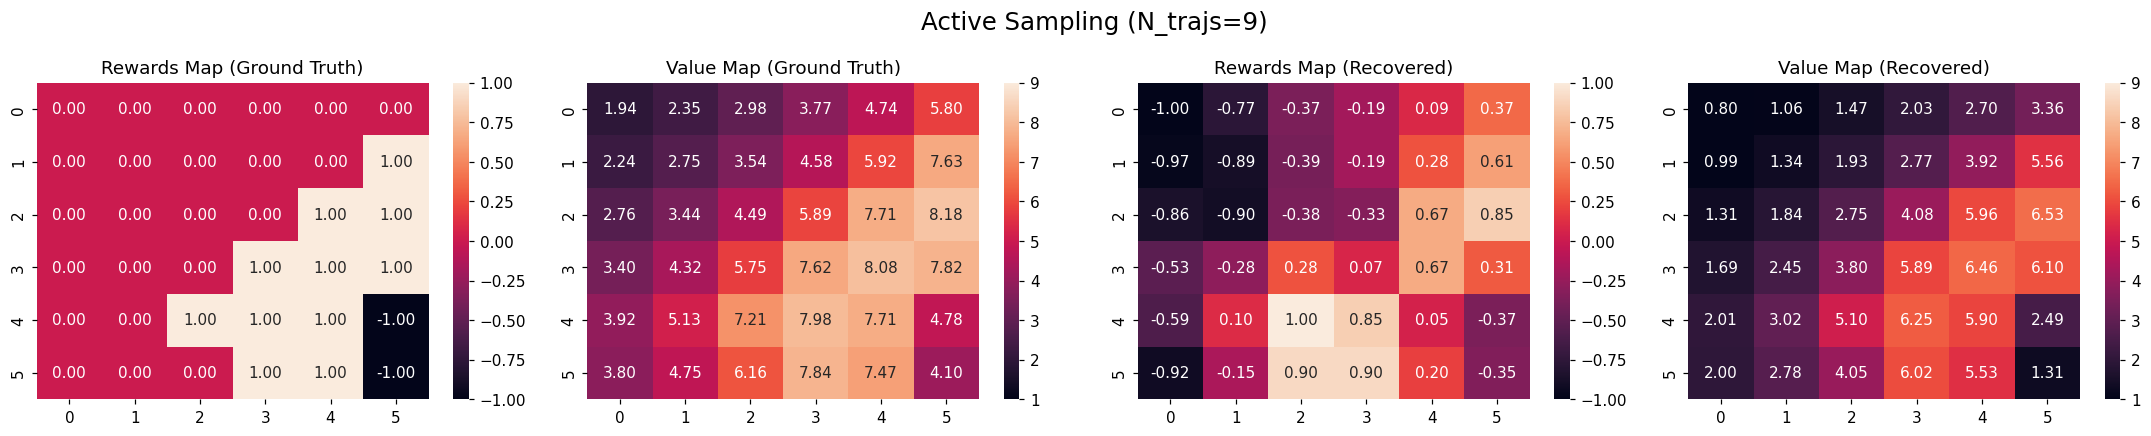

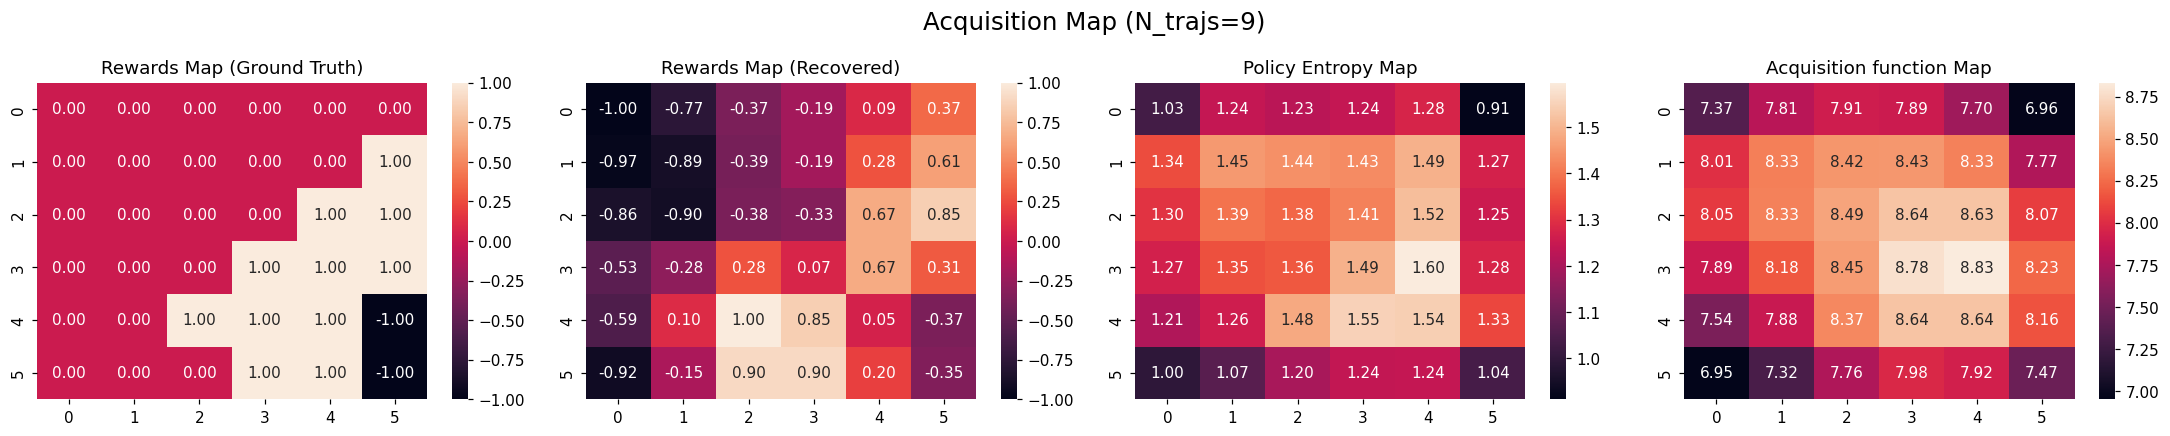

In [64]:
visualizer = Visualizer(history_deepmaxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

## Random

In [85]:
DEEP_MAXENT_RANDOM_ARGS = """
--exp_name deepmaxent_random
--type object
--n_objects 7
--n_colours 4
--height 6
--width 6
--gamma 0.8
--act_random 0.3
--n_trajs 10
--l_traj 6
--learning_rate 0.001
--n_iters 50
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 2.0
--weight_decay 1.0
--hiddens 16 16
--device cuda
--seed 0
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_RANDOM_ARGS)
print(args.exp_name)
history_deepmaxent_random = run_deepmaxent_irl(args, init_start_pos=init_start_pos)

deepmaxent_random
[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration
[INFO] Initialize trajectories
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:1--
[[ 0.4805  0.1001 -0.2092 -0.3895 -0.4329 -0.2077]
 [ 0.2265 -0.1351 -0.5152 -0.7362 -1.     -0.5341]
 [ 0.2204 -0.0952 -0.6887 -0.7428 -0.7547 -0.539 ]
 [ 0.2788  0.0657 -0.3254 -0.3931 -0.3173 -0.1154]
 [ 0.6383  0.3067  0.0213  0.0904  0.1368  0.3295]
 [ 1.      0.7553  0.6426  0.5983  0.5567  0.7669]]
[INFO - n_trajs:1] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:1] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 2]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 1 2 5]]
[INFO - n_trajs:2] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:2--
[[ 0.6715  0.3637  0.1906  0.2374  0.5632  1.    ]
 [ 0.2794 -0.0439 -0.3614 -0.1572  0.189   0.7986]
 [-0.16   -0.2273 -1.     -0.3631  0.2475  0.8059]
 [-0.741  -0.287  -0.4869 -0.128   0.3569  0.6741]
 [-0.2445 -0.3053 -0.695  -0.0596  0.188   0.5599]
 [ 0.2457  0.0061 -0.0354  0.1569 -0.0655  0.5473]]
[INFO - n_trajs:2] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:2] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 2]
 [0 2 1 1 0 1]
 [1 1 0 0 0 1]
 [0 0 0 1 2 5]]
[INFO - n_trajs:3] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:3--
[[-0.0146 -0.1718 -0.1361 -0.0919 -0.1186  0.2177]
 [-0.6767 -0.566  -0.509  -0.5852 -1.     -0.4364]
 [-0.3382 -0.4122 -0.614  -0.7602 -0.9222 -0.9039]
 [-0.0112 -0.1264 -0.3507 -0.5608 -0.6458 -0.5713]
 [ 0.4961  0.1671 -0.1778 -0.1915 -0.3706 -0.2158]
 [ 1.      0.7101  0.5417  0.3259 -0.0942  0.2373]]
[INFO - n_trajs:3] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:3] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 3 2 2]
 [0 2 1 1 0 1]
 [1 1 0 0 0 1]
 [0 0 0 1 2 5]]
[INFO - n_trajs:4] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:4--
[[ 0.3119 -0.0324 -0.2023 -0.2709 -0.2765  0.0701]
 [-0.1597 -0.4108 -0.6306 -0.7445 -1.     -0.453 ]
 [-0.1761 -0.387  -0.8498 -0.8549 -0.8619 -0.6638]
 [-0.1321 -0.1534 -0.3939 -0.5255 -0.5201 -0.4139]
 [ 0.4217  0.1256 -0.3055 -0.2322 -0.3428 -0.1684]
 [ 1.      0.6243  0.3758  0.2047 -0.1744  0.1615]]
[INFO - n_trajs:4] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:4] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 1 3 2 2]
 [0 2 1 1 0 1]
 [1 2 1 1 1 2]
 [0 1 0 1 2 5]]
[INFO - n_trajs:5] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:5--
[[ 0.0988 -0.1364 -0.1118  0.119   0.3276  0.7697]
 [-0.4628 -0.5981 -0.6225 -0.3743 -0.1838  0.4068]
 [-0.7481 -0.6896 -1.     -0.5548 -0.2014  0.2316]
 [-0.9971 -0.4877 -0.3341 -0.1995  0.0851  0.4481]
 [-0.3545 -0.1265  0.0577  0.1956  0.3388  0.6772]
 [ 0.3371  0.41    0.6256  0.6723  0.6014  1.    ]]
[INFO - n_trajs:5] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:5] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 2 3 2 2]
 [1 3 2 1 0 1]
 [1 2 1 1 1 2]
 [0 1 0 1 2 5]]
[INFO - n_trajs:6] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:6--
[[ 0.5218  0.1688  0.0918  0.2286  0.4932  1.    ]
 [-0.2376 -0.4087 -0.5339 -0.3705 -0.2738  0.3406]
 [-0.3115 -0.4327 -1.     -0.7315 -0.4536 -0.1513]
 [-0.3755 -0.2636 -0.5637 -0.5172 -0.2727 -0.0109]
 [ 0.269  -0.0555 -0.5766 -0.2115 -0.2178  0.1335]
 [ 0.9188  0.541   0.3735  0.3087 -0.1866  0.4501]]
[INFO - n_trajs:6] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:6] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 2 3 2 2]
 [1 3 2 1 0 2]
 [1 2 1 1 1 7]
 [0 1 0 1 2 5]]
[INFO - n_trajs:7] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:7--
[[ 0.4836  0.2039  0.1033  0.1394  0.3338  0.9536]
 [-0.1491 -0.3121 -0.5359 -0.5993 -0.8451  0.3879]
 [-0.1519 -0.278  -1.     -0.7883 -0.4245  0.2726]
 [-0.1411 -0.0535 -0.3461 -0.3087 -0.0132  0.3024]
 [ 0.4634  0.1499 -0.4015 -0.0105 -0.0086  0.3448]
 [ 1.      0.662   0.4834  0.4289 -0.0376  0.5476]]
[INFO - n_trajs:7] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:7] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 2 3 2 2]
 [1 3 2 1 2 6]
 [1 2 1 1 1 7]
 [0 1 0 1 2 5]]
[INFO - n_trajs:8] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:8--
[[ 0.654   0.2901  0.1095  0.0826  0.1707  0.59  ]
 [ 0.0776 -0.2156 -0.5066 -0.5542 -0.611   0.0795]
 [-0.137  -0.2952 -1.     -0.7394 -0.5064 -0.1468]
 [-0.3407 -0.1081 -0.3487 -0.3345 -0.1186  0.2   ]
 [ 0.3406  0.2    -0.0115  0.153   0.2279  0.5339]
 [ 1.      0.7712  0.7278  0.6984  0.5009  0.9115]]
[INFO - n_trajs:8] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:8] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 3 2 1 0]
 [0 1 0 0 0 0]
 [0 1 2 3 2 2]
 [1 3 2 1 2 6]
 [1 2 1 1 1 7]
 [0 1 0 1 2 5]]
[INFO - n_trajs:9] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:9--
[[ 0.5503  0.3573  0.2858  0.2242  0.0097 -0.0329]
 [ 0.0915  0.0019 -0.0894 -0.209  -0.4967 -0.4918]
 [ 0.0734 -0.03   -0.3952 -0.4053 -0.6971 -1.    ]
 [ 0.0311  0.1806  0.0937 -0.144  -0.3362 -0.2794]
 [ 0.5523  0.5316  0.5728  0.3646  0.2795  0.3676]
 [ 0.9553  0.9511  1.      0.873   0.82    0.9159]]
[INFO - n_trajs:9] Policy evaluation
-- evd = 0.000000 ---
[INFO - n_trajs:9] Generating a new demonstrations from Random Points
Visitation Frequency
[[0 0 3 2 1 0]
 [0 1 0 0 0 0]
 [0 1 2 3 2 2]
 [1 3 2 2 2 6]
 [1 3 2 3 2 7]
 [0 1 0 1 2 5]]
[INFO - n_trajs:10] Training Deep MaxEnt IRL


  0%|          | 0/50 [00:00<?, ?it/s]

--Reward Map (Recovered) when n_trajs:10--
[[-0.1852 -0.3307 -0.3218 -0.302  -0.5077 -0.3941]
 [-0.5833 -0.592  -0.5774 -0.6609 -1.     -0.6942]
 [-0.4967 -0.5183 -0.6284 -0.6206 -0.7941 -0.7323]
 [-0.3663 -0.1811 -0.0605 -0.2224 -0.3217 -0.1739]
 [ 0.1977  0.3047  0.5776  0.3283  0.299   0.4193]
 [ 0.7313  0.829   1.      0.8843  0.914   0.9914]]
[INFO - n_trajs:10] Policy evaluation
-- evd = 0.000000 ---


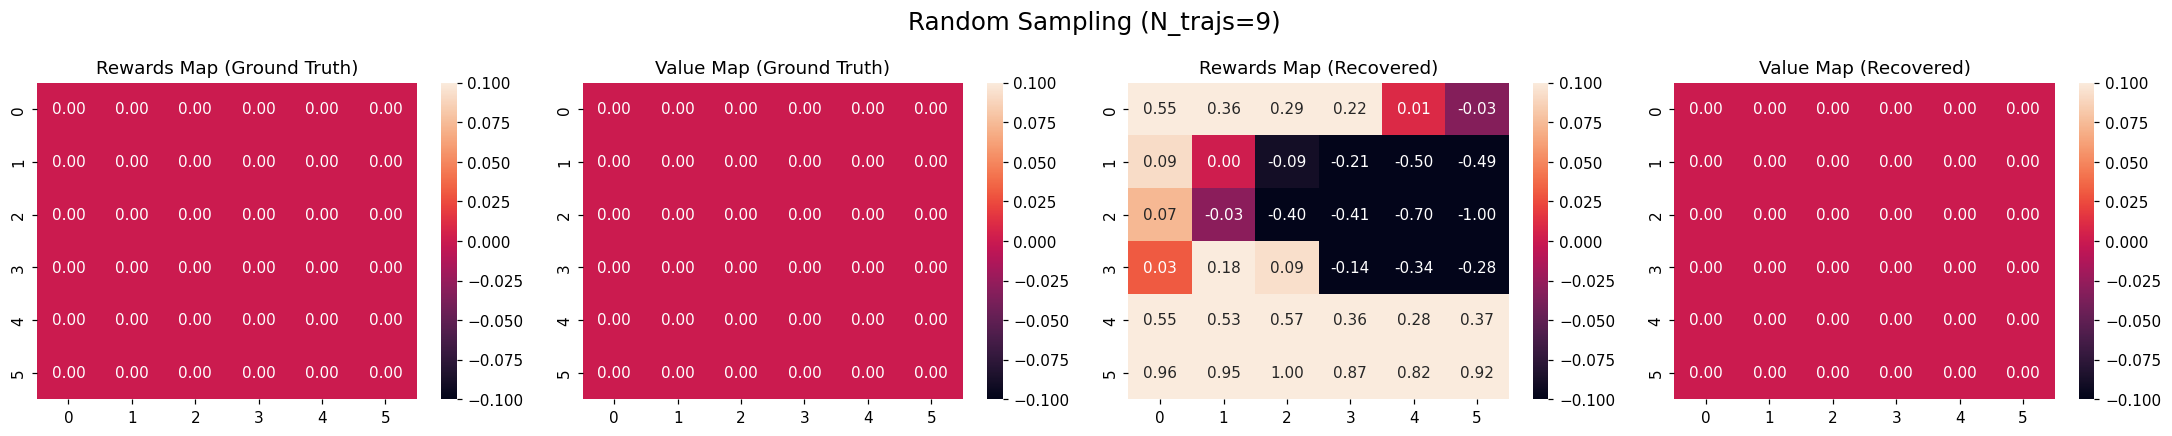

In [87]:
visualizer = Visualizer(history_deepmaxent_random, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)